## Classification

In [20]:
import pandas as pd
import graphviz # pip install graphviz
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.classifier import ConfusionMatrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

### Decision Tree

In [2]:
credit = pd.read_csv('../datasets/credit.csv')
credit.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,'critical/other existing credit',radio/tv,1169,'no known savings',>=7,4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,'existing paid',radio/tv,5951,<100,1<=X<4,2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,<100,4<=X<7,2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,<0,42,'existing paid',furniture/equipment,7882,<100,4<=X<7,2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,<0,24,'delayed previously','new car',4870,<100,1<=X<4,3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad


##### Predictor Variables (Independent)

In [3]:
predictors = credit.iloc[:, 0:20].values

##### Response Variable (Dependent)

In [4]:
classe = credit.iloc[:, 20].values

#### Preprocessing

In [5]:
# DecisionTreeClassifier doesn't work with 'categorical data'
# Preparing categorical data

label_encoder = LabelEncoder()
index_attributes_categorical = [0, 2, 3, 5, 6, 8, 9, 11, 13, 14, 16, 18, 19]

for i in index_attributes_categorical:
    predictors[:, i] = label_encoder.fit_transform(predictors[:, i])

#### Training Base and Test Base

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, classe,
                                                    test_size=0.3, random_state=0)

#### Classification Model

In [12]:
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
predictions = tree.predict(X_test)

print('True Class:', Y_test[0:10])
print('Predicted Class:', predictions[0:10])

True Class: ['good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'bad']
Predicted Class: ['bad' 'good' 'good' 'good' 'good' 'bad' 'good' 'good' 'good' 'bad']


##### Decision Tree Preview

In [14]:
# http://www.webgraphviz.com/
export_graphviz(tree, out_file='tree.dot')

#### Confusion Matrix

In [16]:
confusion = confusion_matrix(Y_test, predictions)

In [18]:
accuracy = accuracy_score(Y_test, predictions)
print(accuracy)

error = 1 - accuracy
print(error)

0.6733333333333333
0.32666666666666666


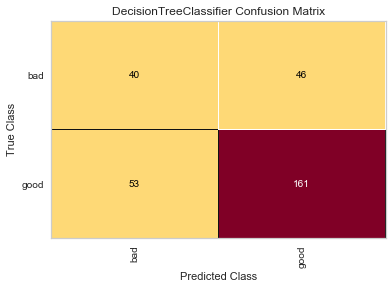

In [21]:
view_confusion_matrix = ConfusionMatrix(DecisionTreeClassifier())
view_confusion_matrix.fit(X_train, Y_train)
view_confusion_matrix.score(X_test, Y_test)
view_confusion_matrix.poof()
